In [4]:
import numpy as np
import pydot
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG



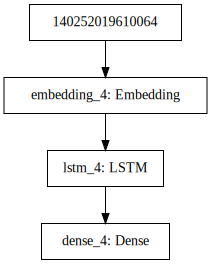

In [12]:
np.random.seed(7)
top_words = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam',　metrics=['accuracy'])
# ここでモデルを可視化する。
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=64)
scores = model.evaluate(x_test, y_test, verbose=0)
print ("accuracy: %.3f%%" % (scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 330s 13ms/step - loss: 0.5039 - acc: 0.7523 - val_loss: 0.3461 - val_acc: 0.8548
Epoch 2/3
25000/25000 [==============================] - 350s 14ms/step - loss: 0.2897 - acc: 0.8822 - val_loss: 0.3050 - val_acc: 0.8728
Epoch 3/3
25000/25000 [==============================] - 339s 14ms/step - loss: 0.2987 - acc: 0.8768 - val_loss: 0.3782 - val_acc: 0.8322
